In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from IPython.core.interactiveshell import InteractiveShell
from scipy.stats import kurtosis, norm, skew
from tqdm.notebook import tqdm

InteractiveShell.ast_node_interactivity = "all"

In [2]:
stocks = [
    "KOZAA.IS",
    "HALKB.IS",
    "ISCTR.IS",
    "KCHOL.IS",
    "TAVHL.IS",
    "GUBRF.IS",
]

In [3]:
data = yf.download(tickers=stocks, interval="1d", period="5y")['Adj Close']

data.clip(lower=0, inplace=True)
data.fillna(0, inplace=True)

[*********************100%***********************]  6 of 6 completed


In [4]:
data.tail()

,GUBRF.IS,HALKB.IS,ISCTR.IS,KCHOL.IS,KOZAA.IS,TAVHL.IS
Date,,,,,,
2021-08-27,50.200001,4.73,5.64,23.600000,15.880000,23.639999
2021-08-31,51.849998,4.76,5.75,23.040001,15.900000,23.520000
2021-09-01,52.849998,4.78,5.72,23.219999,16.200001,23.840000
2021-09-02,53.500000,4.80,5.75,23.180000,16.350000,23.860001
2021-09-03,53.900002,4.77,5.69,23.040001,16.139999,23.740000


In [5]:
log_ret = (np.log(data) - np.log(data.shift(1))).dropna()
log_ret.tail()

,GUBRF.IS,HALKB.IS,ISCTR.IS,KCHOL.IS,KOZAA.IS,TAVHL.IS
Date,,,,,,
2021-08-27,-0.015811,-0.004219,0.007117,0.007656,0.006317,-0.015947
2021-08-31,0.032340,0.006323,0.019316,-0.024015,0.001259,-0.005089
2021-09-01,0.019103,0.004193,-0.005231,0.007782,0.018692,0.013514
2021-09-02,0.012224,0.004175,0.005231,-0.001724,0.009217,0.000839
2021-09-03,0.007449,-0.006270,-0.010490,-0.006058,-0.012927,-0.005042


array([[<AxesSubplot:title={'center':'GUBRF.IS'}>,
        <AxesSubplot:title={'center':'HALKB.IS'}>],
       [<AxesSubplot:title={'center':'ISCTR.IS'}>,
        <AxesSubplot:title={'center':'KCHOL.IS'}>],
       [<AxesSubplot:title={'center':'KOZAA.IS'}>,
        <AxesSubplot:title={'center':'TAVHL.IS'}>]], dtype=object)

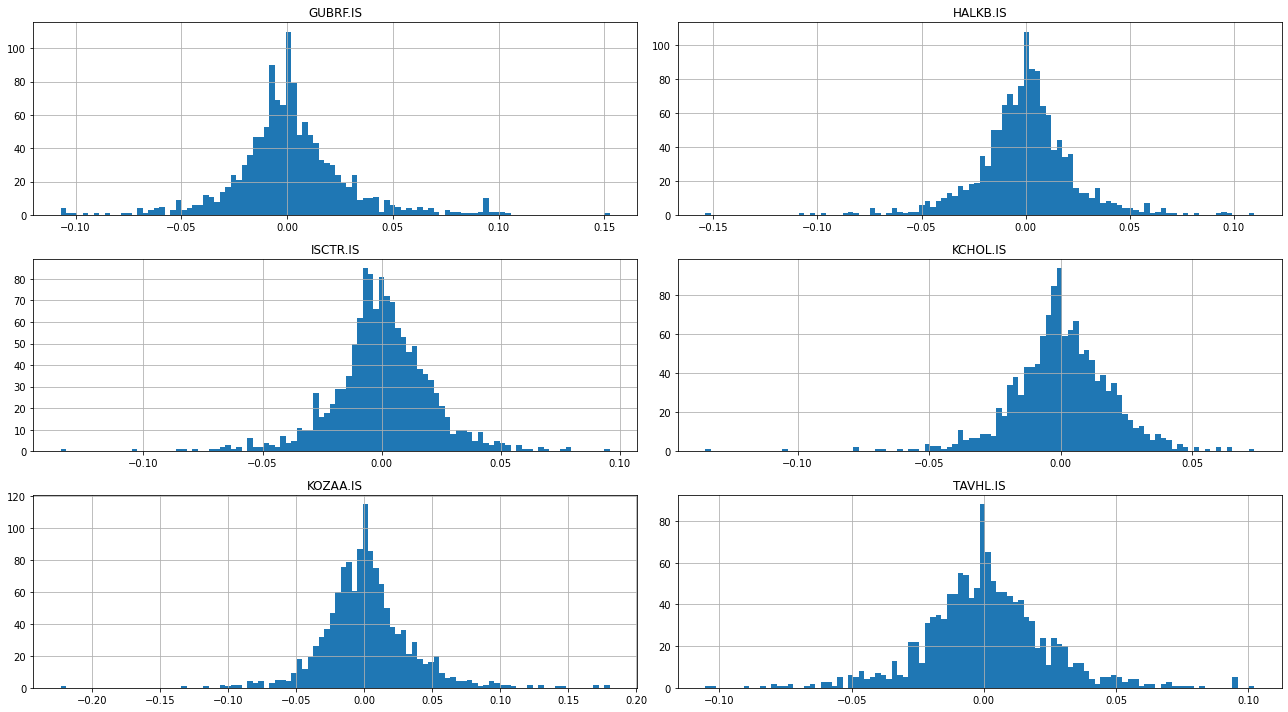

In [6]:
log_ret.hist(bins=100, figsize=(18, 10))
plt.tight_layout()

In [7]:
# Simulation
stock_count = log_ret.shape[1]
number_of_portfolios = 7500
portfolio_weights = np.zeros((number_of_portfolios, stock_count))
portfolio_returns = np.zeros(number_of_portfolios)
portfolio_volatilities = np.zeros(number_of_portfolios)
portfolio_sharpe = np.zeros(number_of_portfolios)
portfolio_sortino = np.zeros(number_of_portfolios)

for i in tqdm(range(number_of_portfolios)):
    # Weights
    weights = np.array(np.random.random(stock_count))

    # Normalize weights
    weights = weights/np.sum(weights)

    # Store weights
    portfolio_weights[i, :] = weights

    # Expected return
    portfolio_returns[i] = np.sum((log_ret.mean() * weights) * 252)

    # Expected volatility
    portfolio_volatilities[i] = np.sqrt(
        np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    portfolio_sharpe[i] = portfolio_returns[i] / portfolio_volatilities[i]

  0%|          | 0/7500 [00:00<?, ?it/s]

In [8]:
# Find maximum Sharpe ratio and its return and volatility
max_sr = portfolio_sharpe.argmax()
max_sr_ret = portfolio_returns[max_sr]
max_sr_vol = portfolio_volatilities[max_sr]

In [9]:
# Minimum risk (volatility) portfolio
min_risk = portfolio_volatilities.argmin()
min_risk_ret = portfolio_returns[min_risk]
min_risk_vol = portfolio_volatilities[min_risk]

In [10]:
# Maximum return portfolio
max_retf = portfolio_returns.argmax()
max_retf_ret = portfolio_returns[max_retf]
max_retf_vol = portfolio_volatilities[max_retf]

<Figure size 1296x720 with 0 Axes>

Text(0.5, 0, 'Volatility')

Text(0, 0.5, 'Return')

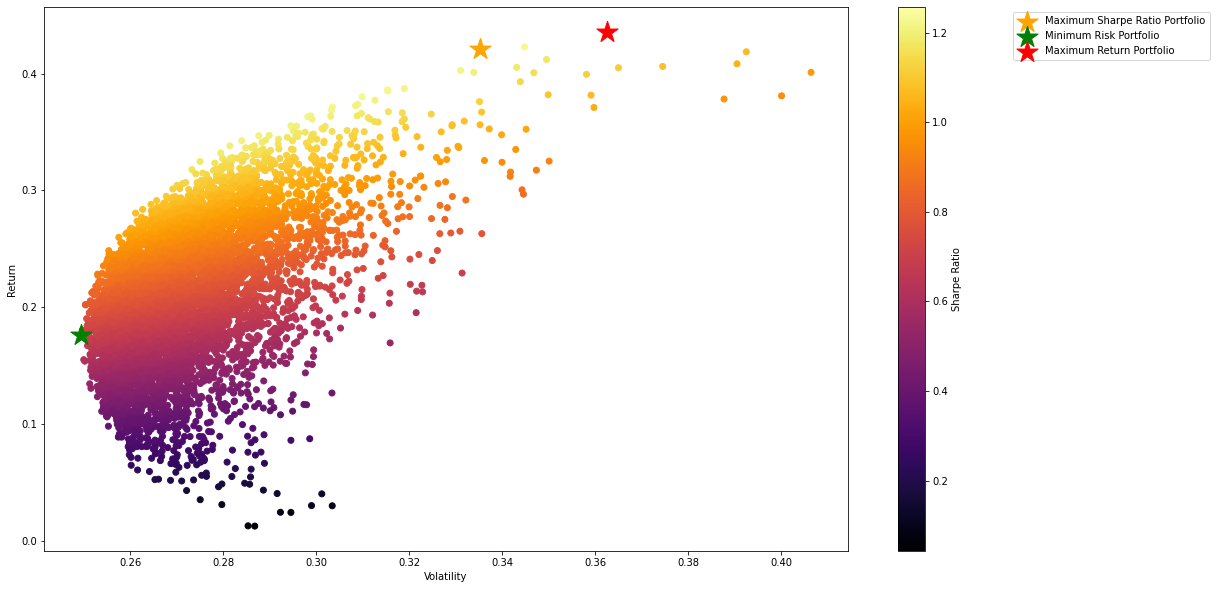

In [11]:
plt.figure(figsize=(18, 10))
plt.scatter(portfolio_volatilities, portfolio_returns,
            c=portfolio_sharpe, cmap="inferno")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")

plt.scatter(max_sr_vol, max_sr_ret, c="orange", marker='*',
            s=500, label="Maximum Sharpe Ratio Portfolio")
plt.scatter(min_risk_vol, min_risk_ret, c="green",
            marker='*', s=500, label="Minimum Risk Portfolio")
plt.scatter(max_retf_vol, max_retf_ret, c="red", marker='*',
            s=500, label="Maximum Return Portfolio")
plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1))